<a href="https://colab.research.google.com/github/sn1411/TSF-Task-1/blob/main/The_Spark_Foundations_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TSF GRIP MAY-2021**

### **Task-1 Prediction using supervised ML**
## Predict the percentage of a student based on the no. of study hours. 

### **Author - SHILPA NAYAK**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading data
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Five point summary of the data**

In [ ]:
#describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Plotting our data**

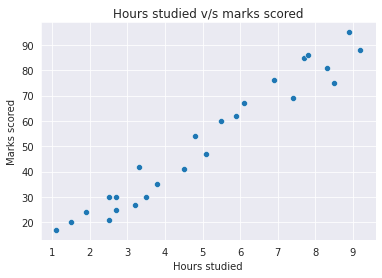

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x = data['Hours'],y = data['Scores'])
plt.title('Hours studied v/s marks scored')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.show()

**Preparing data for training, testing and spliting**

In [ ]:
#The training set should be a random selection of 80% of the original data.
#The testing set should be the remaining 20%.
X = (data['Hours'].values).reshape(-1,1)
Y = (data['Scores'].values)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)               #splitting the data

In [ ]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train)                                                                              #training the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

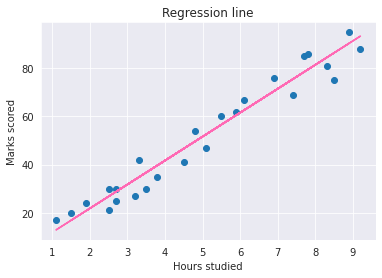

In [ ]:
#ploting regression line
#line = slope * x + intercept
line = reg.coef_ * X + reg.intercept_

sns.set_style('darkgrid')
plt.title('Regression line')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.scatter(X, Y)
plt.plot(X, line, color = 'hotpink');
plt.show()

**Making predictions**

In [ ]:
#Predicting the test data
pred=reg.predict(X_test)

In [ ]:
#How well does my training data fit in a regression?
from sklearn.metrics import r2_score
r2_score(Y_test,pred)                                                                       #r2, also known as r-squared

0.9367661043365056

In [ ]:
#The result 0.93676 shows that the model fits the testing set well, and we can use the model to predict future values.

**Comparison between actual and predicted data**

In [ ]:
Y_pred = reg.predict(X_test)
df1 = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_pred})
print(df1)

   Actual score  Predicted score
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


**Problem statement- What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hour=9.25
score=reg.predict([[hour]])
print("Hours studied:",hour)
print("Marks scored:",score[0])

Hours studied: 9.25
Marks scored: 93.89272889341652


**Evaluating accuracy of model**

In [ ]:
#using mean absolute error
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error:  4.130879918502482
